In [3]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../object-repair_*.csv')]
data = pd.concat(frames, ignore_index=True)

def classify(r):
    if r['fragment_k'] == 1:
        return "Kademlia"
    else:
        cache = int(r['cache_sec']) // 3600
        return "Entropy$_{" + str(cache) + "}$"

data['Protocol'] = data.apply(classify, axis=1)
data

,churn_rate,node_count,duration,faulty_rate,object_count,chunk_n,chunk_k,fragment_n,fragment_k,cache_sec,targeted_count,data_lost,targeted,repair,alive_count,Protocol
0,4,100000,31536000,0,1,10,8,80,32,43200,0,0,0,3.150039e+02,80,Entropy$_{12}$
1,4,100000,31536000,0,1,10,8,80,32,43200,0,0,0,3.082852e+02,80,Entropy$_{12}$
2,4,100000,31536000,0,1,10,8,80,32,43200,0,0,0,3.098203e+02,80,Entropy$_{12}$
3,4,100000,31536000,0,1,10,8,80,32,43200,0,0,0,3.126406e+02,80,Entropy$_{12}$
4,4,100000,31536000,0,10,10,8,80,32,0,0,0,0,5.301875e+03,80,Entropy$_{0}$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4,100000,31536000,0,10000,10,8,80,32,43200,0,0,0,3.118525e+06,80,Entropy$_{12}$
296,4,100000,31536000,0,10000,10,8,80,32,0,0,0,0,5.284602e+06,80,Entropy$_{0}$
297,4,100000,31536000,0,10000,10,8,80,32,43200,0,0,0,3.115599e+06,80,Entropy$_{12}$
298,4,100000,31536000,0,10000,10,8,80,32,0,0,0,0,5.283549e+06,80,Entropy$_{0}$


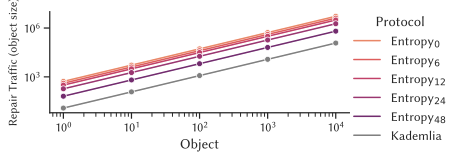

In [4]:
palette = sns.color_palette('flare', n_colors=5)
sns.relplot(data=data, 
    kind="line",
    x="object_count", y="repair", hue="Protocol", 
    hue_order=["Entropy$_{0}$", "Entropy$_{6}$", "Entropy$_{12}$", "Entropy$_{24}$", "Entropy$_{48}$", "Kademlia"],
    marker="o", palette=[*palette, 'gray'],
    height=2.56, aspect=2.) \
.set_xlabels("Object") \
.set_ylabels("Repair Traffic (object size)", fontdict={"size": "small"}) \
.set(xscale="log", yscale="log") \
.savefig("../object-repair.pdf")